# STA 141B Assignment 3

Due __XXXXX, 2024__ by __11:59pm__. Submit your work by uploading it to Gradescope through Canvas.

Instructions:

1. Provide your solutions in new cells following each exercise description. Create as many new cells as necessary. Use code cells for your Python scripts and Markdown cells for explanatory text or answers to non-coding questions. Answer all textual questions in complete sentences.
2. The use of assistive tools is permitted, but must be indicated. You will be graded on you proficiency in coding. Produce high quality code by adhering to proper programming principles. 
3. Export the .jpynb as .pdf and submit it on Gradescope in time. To facilitate grading, indicate the area of the solution on the submission. Submissions without indication will be marked down. No late submissions accepted. 
4. If test cases are given, your solution must be in the same format. 
5. The total number of points is 10. 

__Exercise 1__

We will compute the [PageRank](https://en.wikipedia.org/wiki/PageRank) of the articles of the [Hawaiian](https://en.wikipedia.org/wiki/Hawaiian_language) wikipedia, which is available at [haw.wikipedia.org](https://haw.wikipedia.org/wiki/Ka_papa_kinohi). Additional information of the Hawaiian wiki can be found [here](https://meta.wikimedia.org/wiki/List_of_Wikipedias). 

_Hints: If you don't speak Hawaiian, you might want to learn the wiki logic from the English wikipedia, and translate your findings. Also, caching is recommended._

__(a)__ Use the special [AllPages](https://haw.wikipedia.org/wiki/Papa_nui:AllPages) page and understand its logic to retrieve the url of all articles in the Hawaiian wikipedia. Make sure to skip redirections.

_How many articles did you find? (I found a bit more than 2541.)_

In [8]:
# a) 
import requests
import requests_cache
import lxml.html as lx
import re

ModuleNotFoundError: No module named 'requests_cache'

In [13]:
import requests
from lxml import html

def fetch_pages_from_url(url):
    response = requests.get(url)
    doc = html.fromstring(response.content)
    # Adjust the XPath as needed to correctly target the article links
    links = doc.xpath('//div[@class="mw-allpages-body"]//li/a/@href')
    return links

# List of URLs for each segment of the "All Pages" list
segment_urls = [
    'https://haw.wikipedia.org/wiki/Papa_nui:AllPages',
    'https://haw.wikipedia.org/w/index.php?title=Papa_nui:AllPages&from=CA+Pe%C3%B1arol',
    'https://haw.wikipedia.org/w/index.php?title=Papa_nui:AllPages&from=Frans+Hals',
    'https://haw.wikipedia.org/w/index.php?title=Papa_nui:AllPages&from=Jean+Auguste+Dominique+Ingres',
    'https://haw.wikipedia.org/w/index.php?title=Papa_nui:AllPages&from=Lepanona',
    'https://haw.wikipedia.org/w/index.php?title=Papa_nui:AllPages&from=M%C3%B6lnlycke',
    'https://haw.wikipedia.org/w/index.php?title=Papa_nui:AllPages&from=P%C4%81pua+N%C5%ABkini',
    'https://haw.wikipedia.org/w/index.php?title=Papa_nui:AllPages&from=Ta%C3%ADs+Ara%C3%BAjo',
    'https://haw.wikipedia.org/w/index.php?title=Papa_nui:AllPages&from=Yashwant+Bramhadev+Raut',




    # Add the rest of the URLs for each segment here
]

all_page_links = []

for url in segment_urls:
    segment_links = fetch_pages_from_url(url)
    all_page_links.extend(segment_links)

# Remove duplicates if necessary
all_page_links = list(set(all_page_links))

print(f"Found {len(all_page_links)} unique pages.")


Found 3064 unique pages.


__(b, i)__ Write a function that scans an article given by its url and retrieves all links to other articles in the Hawaiian wikipedia. Avoid links to special pages, images or the ones that point to another website. Only count the proper article for links that point to a specific section. Use regular expressions to manage these cases. 
__(ii)__ Make sure to match redirections to their correct destiation article. To this end, find how wikipedia treats redirections and retrieve the true article. _(Help: Try searching for 'uc davis' on en.wikipedia.org')_
To this end, I used the collection or article urls obtained in (a), which I stored in a dict object to allow for fast lookups. Then, for each new found link I checked whether that link appeared in the dict. If not, It might be a re-direction and receive special attention.  
__(iii)__ Request all articles and obtain all links to other articles. 


In [10]:
import requests
from lxml import html
import re

def retrieve_article_links(url, article_dict):
    response = requests.get(url)
    doc = html.fromstring(response.content)
    links = doc.xpath('//a/@href')
    
    # Regular expression to filter valid article links and ignore special pages, images, or external links
    article_link_pattern = re.compile(r'^/wiki/([^:]+)$')
    valid_links = set()
    
    for link in links:
        if article_link_pattern.match(link):
            full_url = 'https://haw.wikipedia.org' + link
            if link in article_dict:
                # The link is already known, add it directly
                valid_links.add(article_dict[link])
            else:
                # Potential redirection, special handling might be needed
                valid_links.add(full_url)  # Placeholder, redirection handling will be added later
    
    return list(valid_links)

def follow_redirection(url):
    # Make sure the URL starts with 'https://'
    if not url.startswith('http://') and not url.startswith('https://'):
        url = 'https://haw.wikipedia.org' + url
    response = requests.get(url)
    doc = html.fromstring(response.content)
    canonical_link = doc.xpath("//link[@rel='canonical']/@href")
    if canonical_link:
        return canonical_link[0]  # Use the canonical URL as the final URL
    return url 

def extract_article_links_from_index_page(url):
    response = requests.get(url)
    doc = html.fromstring(response.content)
    # Assuming article links can be distinguished on the index pages
    links = doc.xpath('//a[contains(@href, "/wiki/") and not(contains(@href, ":"))]/@href')
    full_links = ['https://haw.wikipedia.org' + link for link in links]
    return full_links

article_urls = [
    'https://haw.wikipedia.org/wiki/Papa_nui:AllPages',
    'https://haw.wikipedia.org/w/index.php?title=Papa_nui:AllPages&from=CA+Pe%C3%B1arol',
    'https://haw.wikipedia.org/w/index.php?title=Papa_nui:AllPages&from=Frans+Hals',
    'https://haw.wikipedia.org/w/index.php?title=Papa_nui:AllPages&from=Jean+Auguste+Dominique+Ingres',
    'https://haw.wikipedia.org/w/index.php?title=Papa_nui:AllPages&from=Lepanona',
    'https://haw.wikipedia.org/w/index.php?title=Papa_nui:AllPages&from=M%C3%B6lnlycke',
    'https://haw.wikipedia.org/w/index.php?title=Papa_nui:AllPages&from=P%C4%81pua+N%C5%ABkini',
    'https://haw.wikipedia.org/w/index.php?title=Papa_nui:AllPages&from=Ta%C3%ADs+Ara%C3%BAjo',
    'https://haw.wikipedia.org/w/index.php?title=Papa_nui:AllPages&from=Yashwant+Bramhadev+Raut',
]


article_dict = {}  # Key: Original URL, Value: Final destination URL
all_found_links = set()  # To store all unique found links

all_article_urls = set()  # Use a set to avoid duplicates


for url in article_urls:
    article_links = extract_article_links_from_index_page(url)
    all_article_urls.update(article_links)

# Now, process each article URL to retrieve and process links
total_link_count = 0

for index, article_url in enumerate(all_article_urls):
    print(f"Processing article {index + 1}/{len(all_article_urls)}: {article_url}")
    final_url = follow_redirection(article_url)
    if final_url != article_url:
        print(f" - Redirected to {final_url}")
        article_dict[article_url] = final_url
    else:
        article_dict[article_url] = article_url
    
    links = retrieve_article_links(final_url, article_dict)
    print(f" - Found {len(links)} links in the article.")
    total_link_count += len(links)  # Add the number of links found in this article to the total count
    
    for link in links:
        resolved_link = follow_redirection('https://haw.wikipedia.org' + link) if not link.startswith('https://') else follow_redirection(link)
        all_found_links.add(resolved_link)
        if resolved_link != 'https://haw.wikipedia.org' + link:
            print(f" - Link {link} redirected to {resolved_link}")
            article_dict[link] = resolved_link
        else:
            article_dict[link] = resolved_link

print(f"Total unique articles processed: {len(article_dict)}")
print(f"Total unique links found: {len(all_found_links)}")
print(f"Total links found (including duplicates): {total_link_count}")

Processing article 1/3062: https://haw.wikipedia.org/wiki/Heleu%C4%AB
 - Found 2 links in the article.
 - Link https://haw.wikipedia.org/wiki/Heleu%C4%AB redirected to https://haw.wikipedia.org/wiki/Heleu%C4%AB
 - Link https://haw.wikipedia.org/wiki/Ka_papa_kinohi redirected to https://haw.wikipedia.org/wiki/Ka_papa_kinohi
Processing article 2/3062: https://haw.wikipedia.org/wiki/Kaumoku%CA%BB%C4%81ina
 - Found 2 links in the article.
 - Link https://haw.wikipedia.org/wiki/Kaumoku%CA%BB%C4%81ina redirected to https://haw.wikipedia.org/wiki/Kaumoku%CA%BB%C4%81ina
 - Link https://haw.wikipedia.org/wiki/Ka_papa_kinohi redirected to https://haw.wikipedia.org/wiki/Ka_papa_kinohi
Processing article 3/3062: https://haw.wikipedia.org/wiki/%C4%80pana_kau
 - Found 3 links in the article.
 - Link https://haw.wikipedia.org/wiki/%CA%BBoihana redirected to https://haw.wikipedia.org/wiki/%CA%BBoihana
 - Link https://haw.wikipedia.org/wiki/%C4%80pana_kau redirected to https://haw.wikipedia.org/wiki/%C


_How many links to other articles are there? (I found 9,000-10,000.)_

__(c)__ Compute the transition matrix (see [here](https://en.wikipedia.org/wiki/Google_matrix) and [here](https://www.amsi.org.au/teacher_modules/pdfs/Maths_delivers/Pagerank5.pdf) for step-by-step instructions). Make sure to tread dangling nodes. You may want to use: 
```
import numpy as np
from scipy.sparse import csr_matrix
```

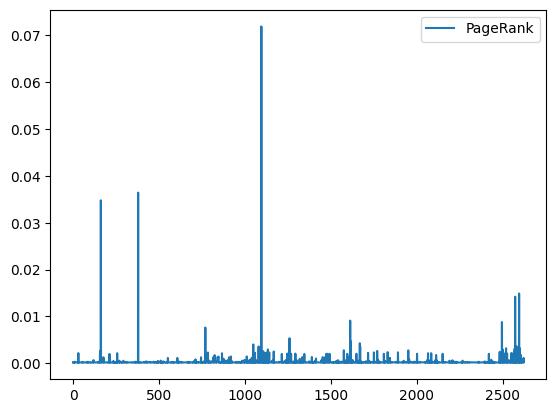

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(n), v, label = "PageRank") 
plt.legend() 
plt.show()

__(d, i)__ Set the damping factor to `0.85` and compute the PageRank for each article, using fourty iterations and starting with a vector with equal entries. __(ii)__ Obtain the top ten articles in terms of PageRank, and, retrieving the articles again, find the correponding English article, if available. 

_Return the corresponding English article titles of the top ten articles from the Hawaiian wikipedia._